# <center>ITS307 Data Analytics : Autumn Semester 2022</center>

# <center>Practical 5</center>

# <center>Feature Engineering</center>

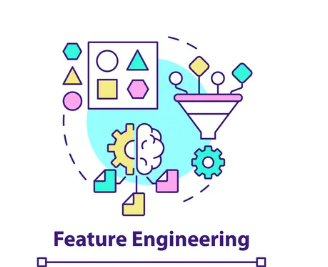

# Table of Contents 
<ol start="0">
<li> Learning Objectives </li>
<li> Imputing Numerical Features </li>
<li> Detecting Outlier</li>
<li> Feature Transformation</li>
<li> Feature Scaling </li>
<li> Working with Categorical Features </li>
<li> Combine Features</li>
</ol>

## 0. Learning Objectives

Implement Numerical feature engineering techniques such as outlier detection, feature transformation, and feature scaling.

By the end of the lab, you should be able to :
- Apply required feature engineering techniques to given dataset.


- Prepare features for traning machine learning model.

# 1. Imputing Numerical  Features using sklearn

Instructions:

- Load data from loan_train.csv file. Create a dataframe names `ndf` which contains only numerical features. Default datatype of `Dependents` feature is `object`. Do you think it should be numerical feature? Justify your answer.


- Use sklearn SimpleImputer to Impute the missing values using most suitable strategy.



In [3]:
# Write your solution here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer

df = pd.read_csv("loan_train.csv")
numericdf = df.select_dtypes(include = 'number')
impute = SimpleImputer(strategy='mean')
ndf = impute.fit_transform(numericdf)
ndf = pd.DataFrame(data = ndf, columns = numericdf.columns)
ndf.isna().sum()

ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
dtype: int64

In [9]:
ndf.head()

ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0           5849.0                0.0  146.412162             360.0   
1           4583.0             1508.0  128.000000             360.0   
2           3000.0                0.0   66.000000             360.0   
3           2583.0             2358.0  120.000000             360.0   
4           6000.0                0.0  141.000000             360.0   

   Credit_History  
0             1.0  
1             1.0  
2             1.0  
3             1.0  
4             1.0

# 2. Outlier Detection

Instructions:

- Choose any one numerical feature and check if there is any outliers.


- Use both inter quartile range method and standard deviation method to remove outliers in the dataset.

C:\Users\Lab-1\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ApplicantIncome'>

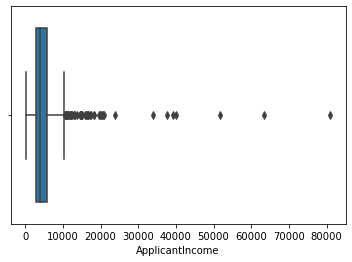

In [14]:
#Write your solution here
x = ndf["ApplicantIncome"]
sns.boxplot(x)


remove outlier using inter quartile

In [55]:
q1 = ndf.ApplicantIncome.quantile(0.25)
q3 = ndf.ApplicantIncome.quantile(0.75)
iqr = q3 - q1
upperlimit = q3 + (iqr*1.5)
lowerlimit = q1 - (iqr*1.5)
df1 = ndf[(ndf.ApplicantIncome>lowerlimit) & (ndf.ApplicantIncome<upperlimit)]
df1.shape

(564, 5)

In [59]:
df2 = ndf[(ndf.ApplicantIncome>upperlimit) | (ndf.ApplicantIncome<lowerlimit)]
df2.index

Int64Index([  9,  34,  54,  67, 102, 106, 115, 119, 126, 128, 130, 138, 144,
            146, 155, 171, 183, 185, 191, 199, 254, 258, 271, 278, 284, 308,
            324, 333, 369, 370, 409, 424, 432, 438, 443, 467, 475, 478, 483,
            487, 493, 506, 509, 525, 533, 534, 561, 572, 594, 604],
           dtype='int64')

C:\Users\Lab-1\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ApplicantIncome'>

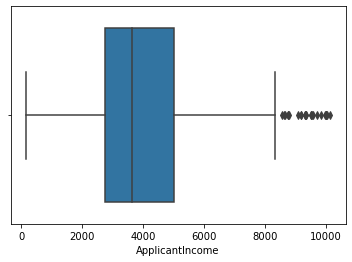

In [16]:
x = df1["ApplicantIncome"]
sns.boxplot(x)

using standard deviation

C:\Users\Lab-1\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='LoanAmount'>

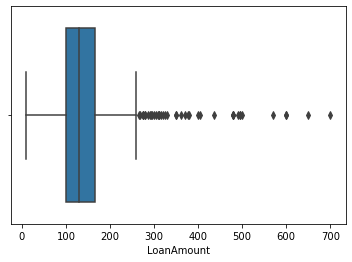

In [17]:
y = ndf["LoanAmount"]
sns.boxplot(y)


In [67]:
std = ndf.LoanAmount.std()
mean = ndf.LoanAmount.mean()
upperlimit = mean + (3*std)
lowerlimit = mean - (3*std)
df2 = ndf[(ndf.LoanAmount>lowerlimit) & (ndf.LoanAmount<upperlimit)]
df2.index


Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            603, 605, 606, 607, 608, 609, 610, 611, 612, 613],
           dtype='int64', length=599)

C:\Users\Lab-1\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='LoanAmount'>

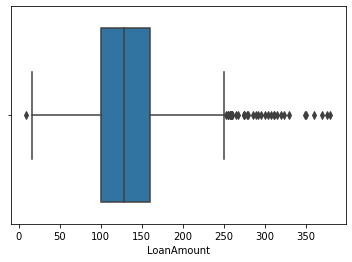

In [21]:
y = df2["LoanAmount"]
sns.boxplot(y)

## 3. Feature Transformation

Instructions:

- Use an appropriate graph to explore the distribution of each numeric feature. 



- Choose any one feature that needs to apply feature transformation. Apply each feature transformation technique and justify which feature transformation technique is suitable for the chosen feature.

In [22]:
ndf.dtypes

ApplicantIncome      float64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
dtype: object

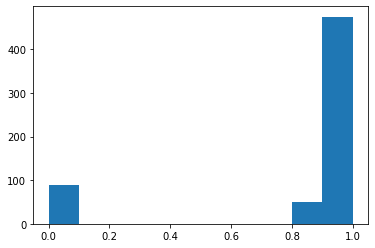

In [24]:
plt.hist(x=ndf.Credit_History)
plt.show()

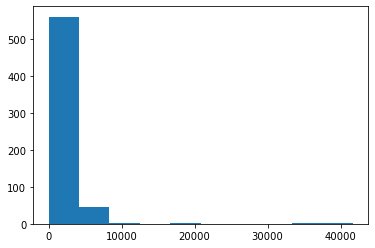

In [25]:
plt.hist(x=ndf.CoapplicantIncome)
plt.show()

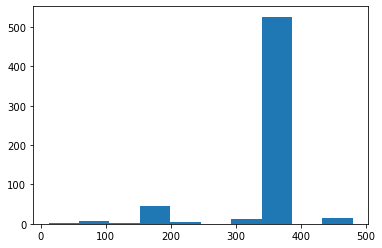

In [26]:
plt.hist(x=ndf.Loan_Amount_Term	)
plt.show()


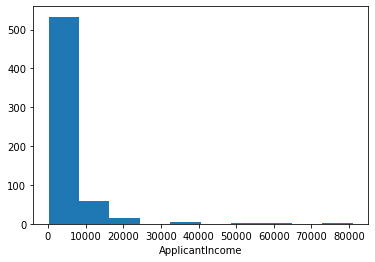

In [27]:
plt.hist(x=ndf.ApplicantIncome)
plt.xlabel("ApplicantIncome")
plt.show()


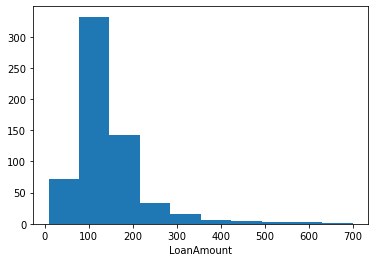

In [28]:
# Write your solution here

plt.hist(x=ndf.LoanAmount)
plt.xlabel("LoanAmount")
plt.show()


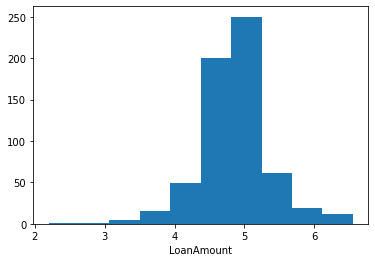

In [29]:
#using Logarithmic Transformation
x=np.log(ndf["LoanAmount"])
plt.hist(x)
plt.xlabel("LoanAmount")
plt.show()

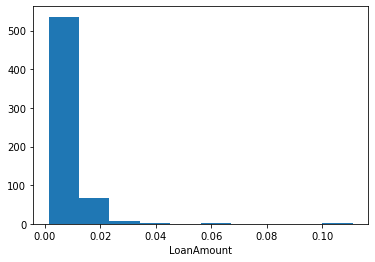

In [30]:
#reciprocal
x= np.reciprocal(ndf.LoanAmount)
plt.hist(x)
plt.xlabel("LoanAmount")
plt.show()

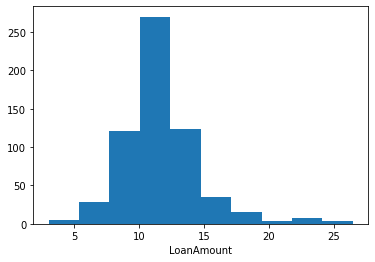

In [31]:
#Squareroot
x= np.sqrt(ndf.LoanAmount)
plt.hist(x)
plt.xlabel("LoanAmount")
plt.show()

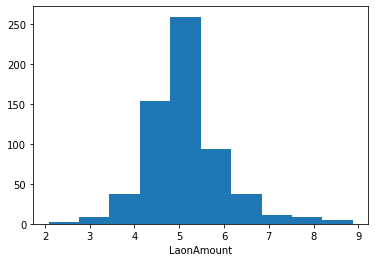

In [32]:
#cubic root
x = np.cbrt(ndf.LoanAmount)
plt.hist(x)
plt.xlabel("LaonAmount")
plt.show()

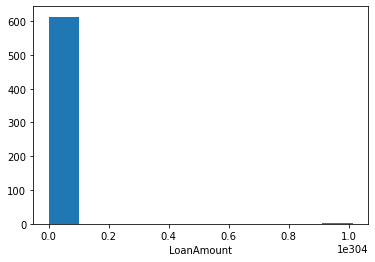

In [33]:
#expontenial 
x= np.exp(ndf.LoanAmount)
plt.hist(x)
plt.xlabel("LoanAmount")
plt.show()

## 4. Feature Scaling

Instructions:


- Use all feature scaling techniques to scale all the numerical features in the given datasets and observe the difference in the scaled features when you use different scaling techniques.


In [34]:
# Write your solution here
# min max scaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
numeric = scaler.fit_transform(ndf)
numeric= pd.DataFrame(numeric, columns = numericdf.columns)
numeric

ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0           0.070489           0.000000    0.198860          0.743590   
1           0.054830           0.036192    0.172214          0.743590   
2           0.035250           0.000000    0.082489          0.743590   
3           0.030093           0.056592    0.160637          0.743590   
4           0.072356           0.000000    0.191027          0.743590   
..               ...                ...         ...               ...   
609         0.034014           0.000000    0.089725          0.743590   
610         0.048930           0.000000    0.044863          0.358974   
611         0.097984           0.005760    0.353111          0.743590   
612         0.091936           0.000000    0.257598          0.743590   
613         0.054830           0.000000    0.179450          0.743590   

     Credit_History  
0               1.0  
1               1.0  
2               1.0  
3               1.0  
4               1.0  
..              ...  
609             1.0  
610             1.0  
611             1.0  
612             1.0  
613             0.0  

[614 rows x 5 columns]

In [35]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
numeric = scaler.fit_transform(ndf)
numeric = pd.DataFrame(numeric, columns = numericdf.columns)
numeric

ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0           0.072991          -0.554487    0.000000          0.279851   
1          -0.134412          -0.038732   -0.219273          0.279851   
2          -0.393747          -0.554487   -0.957641          0.279851   
3          -0.462062           0.251980   -0.314547          0.279851   
4           0.097728          -0.554487   -0.064454          0.279851   
..               ...                ...         ...               ...   
609        -0.410130          -0.554487   -0.898095          0.279851   
610        -0.212557          -0.554487   -1.267279         -2.518655   
611         0.437174          -0.472404    1.269371          0.279851   
612         0.357064          -0.554487    0.483367          0.279851   
613        -0.134412          -0.554487   -0.159728          0.279851   

     Credit_History  
0          0.451640  
1          0.451640  
2          0.451640  
3          0.451640  
4          0.451640  
..              ...  
609        0.451640  
610        0.451640  
611        0.451640  
612        0.451640  
613       -2.410441  

[614 rows x 5 columns]

## 5. Categorical features


Instructions:


- Get all your categorical data in a new dataframe `cdf`. Refer your last class work on feature engineering on categorical features to make your categorical features ready for tranning machine learning model.

In [76]:
# Write your solution here
df1 = pd.read_csv('loan_train.csv')
categorical_cols =  df.select_dtypes(include = ['object','bool'])
impute = SimpleImputer(strategy='most_frequent')
data = impute.fit_transform(categorical_cols)
cdf1 = pd.DataFrame(data, columns=categorical_cols.columns)
cdf1.drop(columns = 'Loan_ID', inplace =True)
cdf1.isna().sum()


Gender           0
Married          0
Dependents       0
Education        0
Self_Employed    0
Property_Area    0
Loan_Status      0
dtype: int64

In [61]:
categorical_columns = ['Gender','Married','Self_Employed']
cdf2= cdf1[categorical_columns]
cdf2 = pd.get_dummies(cdf2)

In [71]:
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder()
cdf1[['Property_Area','Education']] = oe.fit_transform(cdf1[['Property_Area','Education']])
cdf3 = pd.DataFrame(cdf1)
cdf3.head()

Gender Married Dependents  Education Self_Employed  Property_Area  \
0   Male      No          0        0.0            No            2.0   
1   Male     Yes          1        0.0            No            0.0   
2   Male     Yes          0        0.0           Yes            2.0   
3   Male     Yes          0        1.0            No            2.0   
4   Male      No          0        0.0            No            2.0   

  Loan_Status  
0           Y  
1           N  
2           Y  
3           Y  
4           Y

In [73]:
cdf = pd.concat([cdf2,cdf3], axis=1)
cdf.drop(['Gender','Married','Self_Employed'], axis=1, inplace=True)
cdf.head()

Gender_Female  Gender_Male  Married_No  Married_Yes  Self_Employed_No  \
0              0            1           1            0                 1   
1              0            1           0            1                 1   
2              0            1           0            1                 0   
3              0            1           0            1                 1   
4              0            1           1            0                 1   

   Self_Employed_Yes Dependents  Education  Property_Area Loan_Status  
0                  0          0        0.0            2.0           Y  
1                  0          1        0.0            0.0           N  
2                  1          0        0.0            2.0           Y  
3                  0          0        1.0            2.0           Y  
4                  0          0        0.0            2.0           Y

## 6. Combine Features

Instructions:

- Create a new dataframe `alldf` which contains transformed categorical and numerical features ready for traning machine learning model.

In [74]:
#Write your solution here
alldf = pd.concat([cdf, ndf], axis=1)
alldf.isna().sum()
alldf


Gender_Female        0
Gender_Male          0
Married_No           0
Married_Yes          0
Self_Employed_No     0
Self_Employed_Yes    0
Dependents           0
Education            0
Property_Area        0
Loan_Status          0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
dtype: int64

In [46]:
 alldf.head()

Gender_Female  Gender_Male  Married_No  Married_Yes  Self_Employed_No  \
0              0            1           1            0                 1   
1              0            1           0            1                 1   
2              0            1           0            1                 0   
3              0            1           0            1                 1   
4              0            1           1            0                 1   

   Self_Employed_Yes Dependents  Education  Property_Area Loan_Status  \
0                  0          0        0.0            2.0           Y   
1                  0          1        0.0            0.0           N   
2                  1          0        0.0            2.0           Y   
3                  0          0        1.0            2.0           Y   
4                  0          0        0.0            2.0           Y   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0           5849.0                0.0  146.412162             360.0   
1           4583.0             1508.0  128.000000             360.0   
2           3000.0                0.0   66.000000             360.0   
3           2583.0             2358.0  120.000000             360.0   
4           6000.0                0.0  141.000000             360.0   

   Credit_History  
0             1.0  
1             1.0  
2             1.0  
3             1.0  
4             1.0

In [70]:
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression()
lg.fit(alldf,cdf['Loan_Status'])

ValueError: could not convert string to float: '3+'

# <center>THANK YOU